In [2]:
!git clone https://github.com/misbah4064/age_and_gender_detection.git
%cd age_and_gender_detection

Cloning into 'age_and_gender_detection'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 11 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.
/content/age_and_gender_detection


In [3]:
# Downloading pretrained data and unzipping it
!gdown https://drive.google.com/uc?id=1_aDScOvBeBLCn_iv0oxSO8X1ySQpSbIS
# https://drive.google.com/uc?id=1_aDScOvBeBLCn_iv0oxSO8X1ySQpSbIS
!unzip modelNweight.zip

Downloading...
From: https://drive.google.com/uc?id=1_aDScOvBeBLCn_iv0oxSO8X1ySQpSbIS
To: /content/age_and_gender_detection/modelNweight.zip
86.2MB [00:00, 120MB/s] 
Archive:  modelNweight.zip
   creating: modelNweight/
  inflating: modelNweight/age_deploy.prototxt  
  inflating: modelNweight/age_net.caffemodel  
  inflating: modelNweight/gender_deploy.prototxt  
  inflating: modelNweight/gender_net.caffemodel  
  inflating: modelNweight/opencv_face_detector.pbtxt  
  inflating: modelNweight/opencv_face_detector_uint8.pb  


In [4]:
import cv2 as cv
import math
import time
from google.colab.patches import cv2_imshow
# import argparse

def getFaceBox(net, frame, conf_threshold=0.7):
    frameOpencvDnn = frame.copy()
    frameHeight = frameOpencvDnn.shape[0]
    frameWidth = frameOpencvDnn.shape[1]
    blob = cv.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)

    net.setInput(blob)
    detections = net.forward()
    bboxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            bboxes.append([x1, y1, x2, y2])
            cv.rectangle(frameOpencvDnn, (x1, y1), (x2, y2), (0, 255, 0), int(round(frameHeight/150)), 8)
    return frameOpencvDnn, bboxes

faceProto = "modelNweight/opencv_face_detector.pbtxt"
faceModel = "modelNweight/opencv_face_detector_uint8.pb"

ageProto = "modelNweight/age_deploy.prototxt"
ageModel = "modelNweight/age_net.caffemodel"

genderProto = "modelNweight/gender_deploy.prototxt"
genderModel = "modelNweight/gender_net.caffemodel"

MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
genderList = ['Male', 'Female']

# Load network
ageNet = cv.dnn.readNet(ageModel, ageProto)
genderNet = cv.dnn.readNet(genderModel, genderProto)
faceNet = cv.dnn.readNet(faceModel, faceProto)

padding = 20

def age_gender_detector(frame):
    # Read frame
    t = time.time()
    frameFace, bboxes = getFaceBox(faceNet, frame)
    for bbox in bboxes:
        # print(bbox)
        face = frame[max(0,bbox[1]-padding):min(bbox[3]+padding,frame.shape[0]-1),max(0,bbox[0]-padding):min(bbox[2]+padding, frame.shape[1]-1)]

        blob = cv.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
        genderNet.setInput(blob)
        genderPreds = genderNet.forward()
        gender = genderList[genderPreds[0].argmax()]
        # print("Gender Output : {}".format(genderPreds))
        print("Gender : {}, conf = {:.3f}".format(gender, genderPreds[0].max()))

        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]
        print("Age Output : {}".format(agePreds))
        print("Age : {}, conf = {:.3f}".format(age, agePreds[0].max()))

        label = "{},{}".format(gender, age)
        cv.putText(frameFace, label, (bbox[0], bbox[1]-10), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv.LINE_AA)
    return frameFace

In [20]:
!wget https://1.bp.blogspot.com/-Z2gZADFY6Yw/WoMHD1qkeXI/AAAAAAAAB1o/3n1w8axhI_4QScjGt4qa-Hn8ph7cBgNCQCLcBGAs/s1600/Fleer%2BBrittni-11_810.jpg
!ls


--2020-10-28 03:13:36--  https://1.bp.blogspot.com/-Z2gZADFY6Yw/WoMHD1qkeXI/AAAAAAAAB1o/3n1w8axhI_4QScjGt4qa-Hn8ph7cBgNCQCLcBGAs/s1600/Fleer%2BBrittni-11_810.jpg
Resolving 1.bp.blogspot.com (1.bp.blogspot.com)... 172.217.212.132, 2607:f8b0:4001:c03::84
Connecting to 1.bp.blogspot.com (1.bp.blogspot.com)|172.217.212.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 308321 (301K) [image/jpeg]
Saving to: ‘Fleer+Brittni-11_810.jpg’

Fleer+Brittni-11_81 100%[===================>] 301.09K  --.-KB/s    in 0.004s  

2020-10-28 03:13:36 (75.3 MB/s) - ‘Fleer+Brittni-11_810.jpg’ saved [308321/308321]

 50-Long-Haircuts-Hairstyle-Tips-for-Men-2.jpg	 image1.jpg	    README.md
'age&genderDetection.ipynb'			 image2.jpg	   'url?sa=i'
 AR_SuitWide_P-660x400.jpg			 image.jpg	   'url?sa=i.1'
 e8b379d11efbc1af3c41fbf8d7201546.jpg		 modelNweight
 Fleer+Brittni-11_810.jpg			 modelNweight.zip


Gender : Male, conf = 1.000
Age Output : [[8.1283002e-07 4.1853332e-06 4.1290617e-04 4.9944816e-04 9.9860364e-01
  4.4716935e-04 2.5054453e-05 6.8858762e-06]]
Age : (25-32), conf = 0.999


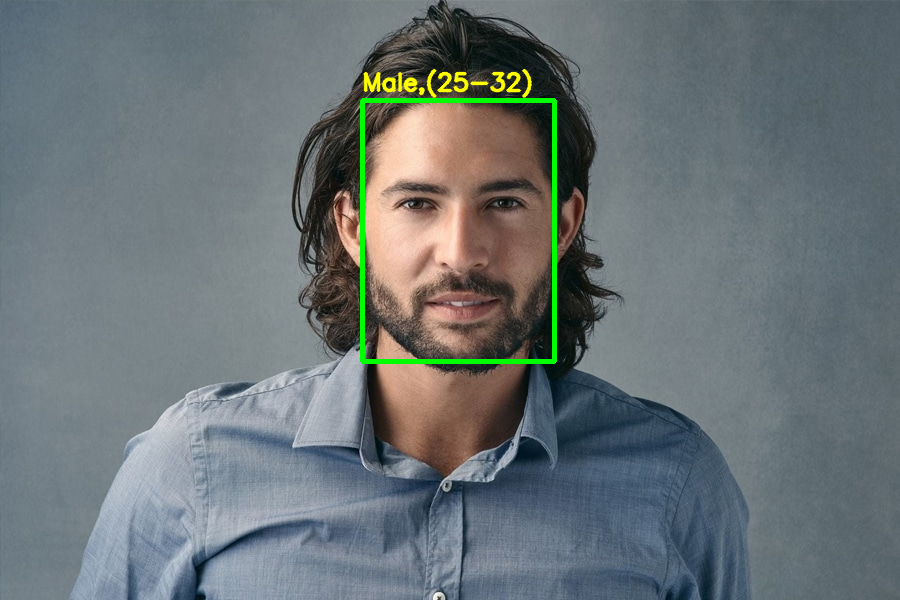

In [15]:
input = cv.imread("50-Long-Haircuts-Hairstyle-Tips-for-Men-2.jpg")
output = age_gender_detector(input)
cv2_imshow(output)

Gender : Female, conf = 1.000
Age Output : [[5.4007307e-07 8.8627894e-05 6.9812393e-01 6.8331379e-03 2.8367606e-01
  1.1192824e-02 6.5986686e-05 1.8874014e-05]]
Age : (8-12), conf = 0.698


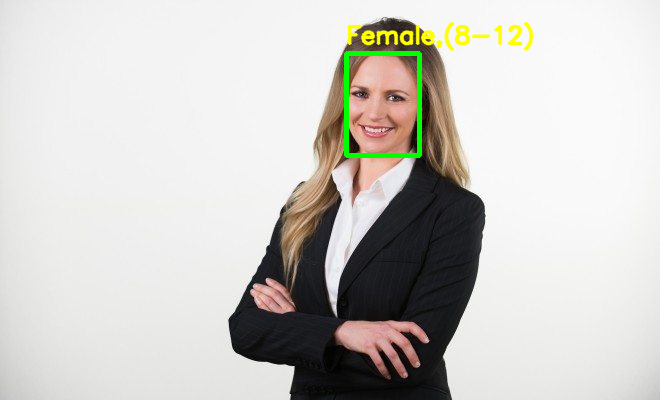

In [17]:
input = cv.imread("AR_SuitWide_P-660x400.jpg")
output = age_gender_detector(input)
cv2_imshow(output)

Gender : Male, conf = 1.000
Age Output : [[9.9551803e-01 3.7822817e-03 2.7055028e-05 2.3254304e-06 6.6387083e-04
  3.4142015e-06 2.3882087e-06 5.6833954e-07]]
Age : (0-2), conf = 0.996
Gender : Male, conf = 1.000
Age Output : [[0.06804492 0.4250285  0.18880866 0.03936575 0.20448758 0.02350302
  0.04801412 0.00274754]]
Age : (4-6), conf = 0.425


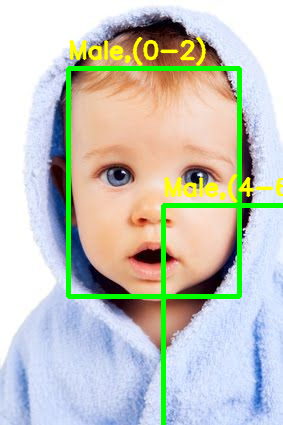

In [22]:
input = cv.imread("e8b379d11efbc1af3c41fbf8d7201546.jpg")
output = age_gender_detector(input)
cv2_imshow(output)